# 📊 Linear Regression Analysis with Scikit-Learn

In this notebook, we perform a Linear Regression analysis using Python's powerful data science libraries. The goal is to build a simple yet effective regression model to understand relationships between variables and make predictions.

# 🔧 Libraries Used:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

1. **NumPy & Pandas:** For numerical operations and data manipulation.
2. **Matplotlib & Seaborn:** For data visualization and exploratory data analysis.
3. **Scikit-learn:** For splitting the dataset, training the model, and evaluating performance.
4. **Warnings:** To suppress unnecessary warnings for cleaner output.

# 📥 Loading the Datasets
We begin by loading the datasets provided for this project. These include:

1. **Training Data:** Contains the features and target variable used to train the model.
2. **Test Data:** Contains the same features as the training set but without the target variable. We'll use this to make predictions.
3. **Sample Submission:** A template for formatting our predictions for submission.

In [3]:
# Load datasets
train_data = pd.read_csv('/kaggle/input/predict-calorie-expenditure/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-calorie-expenditure/test.csv')
sample_submission = pd.read_csv('/kaggle/input/predict-calorie-expenditure/sample_submission.csv')


# 🗂️ Previewing the Data
After loading the datasets, it's important to take a first look at the training data to understand its structure, the types of features available, and to identify any immediate issues such as missing values or unusual data types.

In [3]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [6]:
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [8]:
train_data.shape

(750000, 9)

In [9]:
test_data.shape

(250000, 8)

# 🔍 Checking for Missing Values
Before diving deeper into analysis or model building, it's essential to check for missing values in the dataset. Missing data can affect model performance and may require imputation or removal.

In [11]:
train_data.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

# 🧾 Dataset Overview with .info()
To better understand the structure of our dataset, we use the .info() method. This provides a concise summary including:
1. Number of entries (rows)
2. Column names and data types
3. Non-null counts for each column
4. Memory usage

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


# 📈 Visualizing Feature Distributions
Understanding the distribution of numerical features helps us detect skewness, outliers, and the need for transformations. Below, we visualize the distributions of Height and Weight:



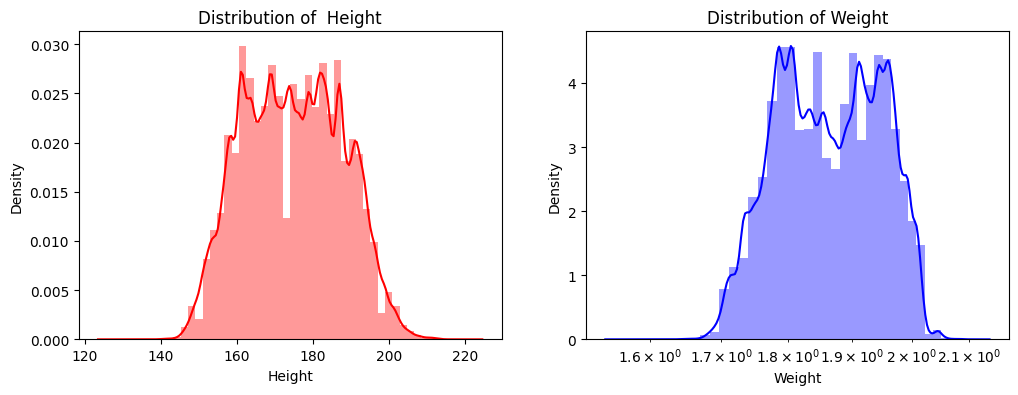

In [14]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(train_data['Height'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of  Height')

ax=f.add_subplot(122)
sns.distplot(np.log10(train_data['Weight']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of Weight')
ax.set_xscale('log');

# 🔬 Scatter Plot: Age vs Calories
To explore how calorie consumption varies with age and whether there's a difference between genders, we use a scatter plot:

Text(0.5, 1.0, 'Scatter plot of Charges vs age')

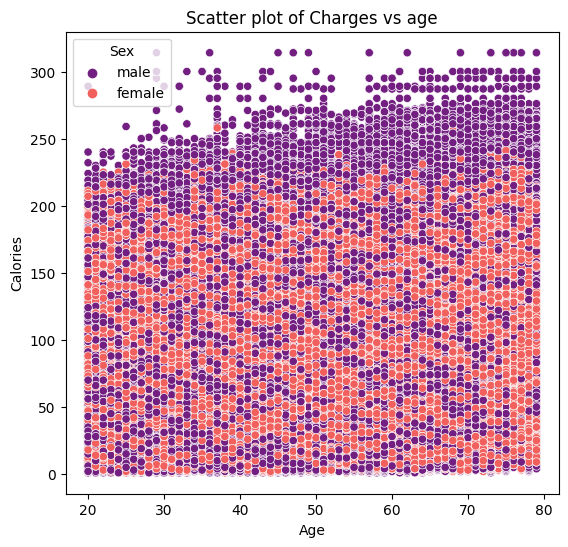

In [16]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Age',y='Calories',data=train_data,palette='magma',hue='Sex',ax=ax)
ax.set_title('Scatter plot of Charges vs age')



# 🧮 Gender Distribution
To understand the gender balance in our dataset, we visualize the distribution of the Sex column using a pie chart:

# 🔗 Pairplot of Numerical Features
To explore the relationships between multiple numerical features, we use a pairplot. This visualization helps identify patterns, correlations, and potential outliers across feature pairs.

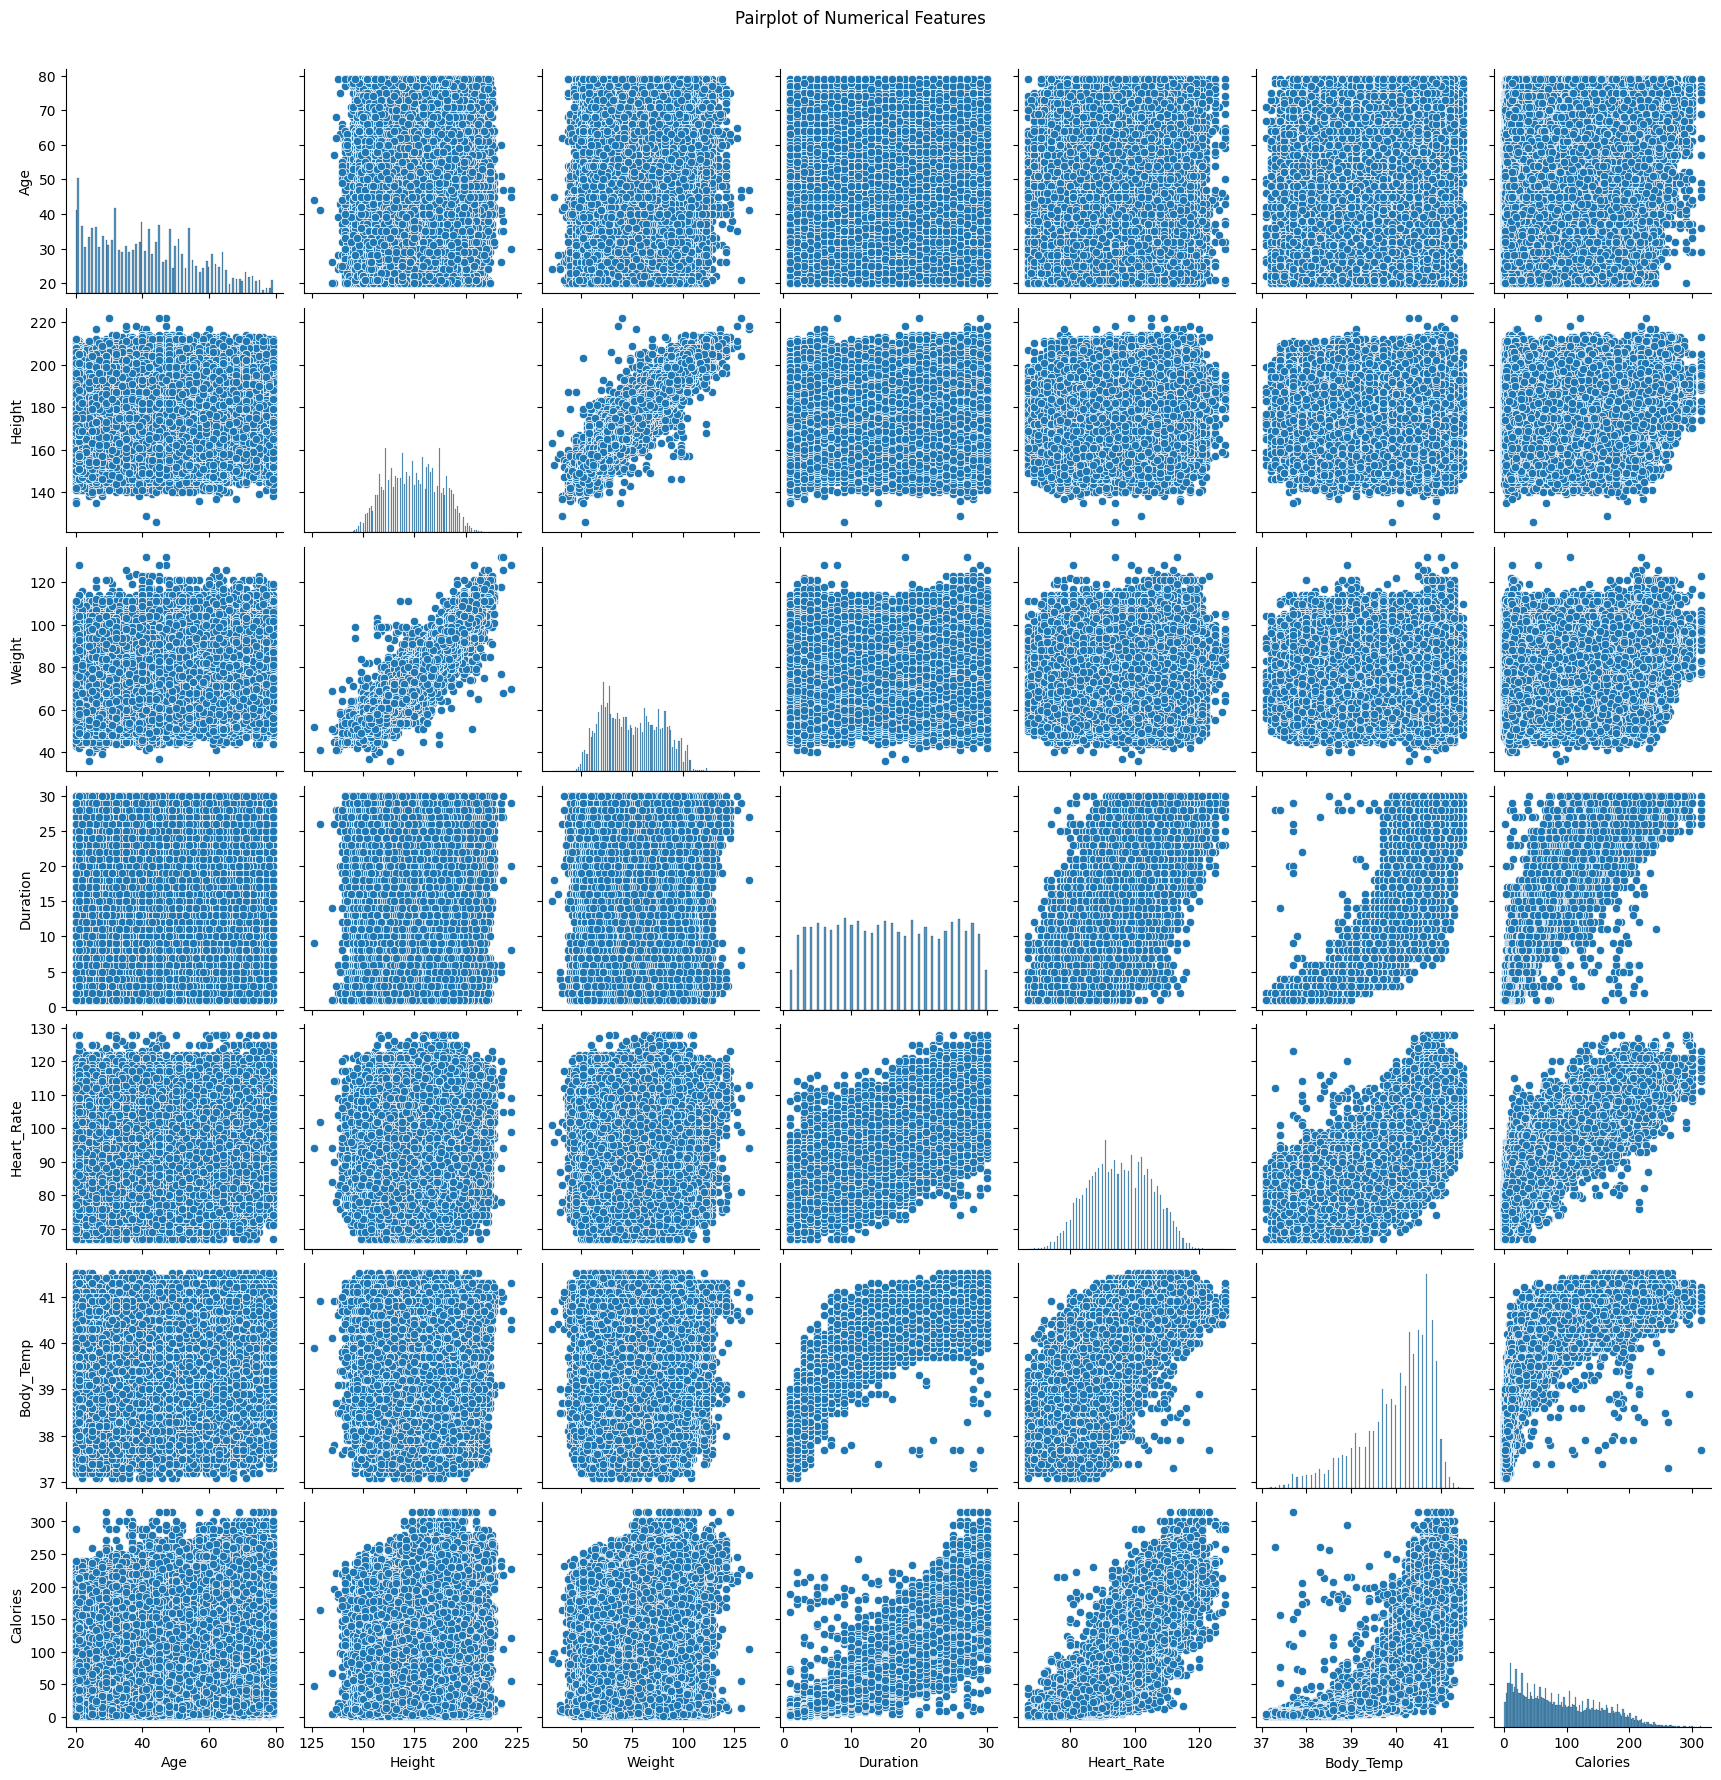

In [17]:
# Pairplot of a subset of features
sns.pairplot(train_data[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# ⏱️ Distribution of Duration
Understanding how long activities last can provide insights into user behavior or energy expenditure. Here, we visualize the distribution of the Duration feature using a histogram with a KDE (Kernel Density Estimate) overlay:

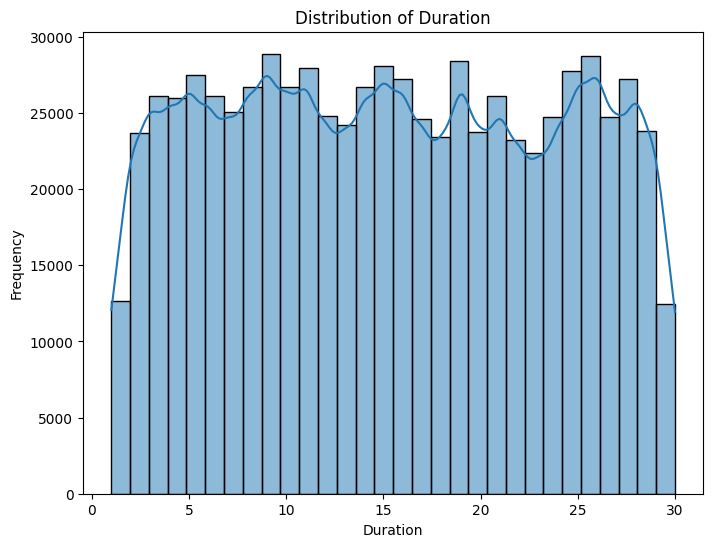

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Duration'], bins=30, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


# ❤️ Distribution of Heart Rate
Visualizing the distribution of heart rate values helps us understand the typical range and detect any anomalies or skewness in the data.

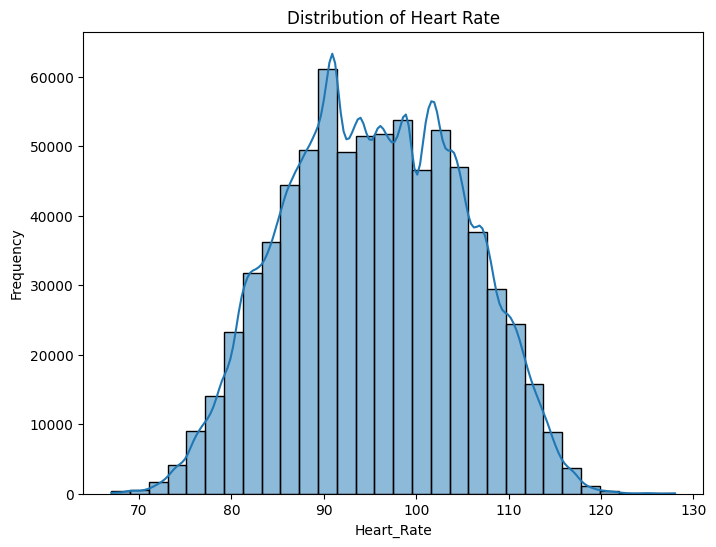

In [20]:
# Distribution of Heart Rate
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Heart_Rate'], bins=30, kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart_Rate')
plt.ylabel('Frequency')
plt.show()

# 🌡️ Distribution of Body Temperature
Analyzing the distribution of body temperature helps us understand the typical physiological range in the dataset and detect any anomalies.

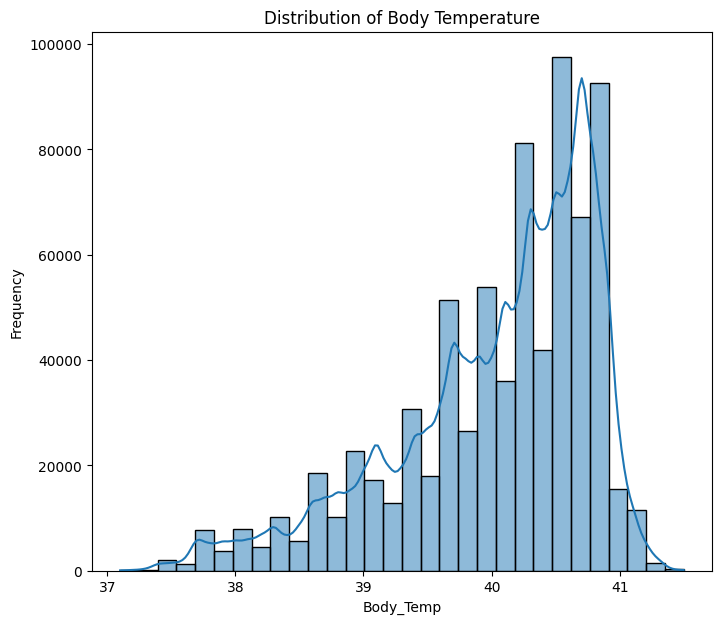

In [21]:
plt.figure(figsize=(8,7))
sns.histplot(train_data['Body_Temp'], bins=30, kde=True)
plt.title('Distribution of Body Temperature')
plt.xlabel('Body_Temp')
plt.ylabel('Frequency')
plt.show()


# 🧠 Encoding Categorical Variables & Feature Selection
Before training our model, we need to prepare the data:

# 🔄 Encoding
We convert the categorical variable Sex into numerical format using simple label encoding:

'male' → 0
'female' → 1

In [7]:
label_enc = LabelEncoder()
train_data['Sex'] = label_enc.fit_transform(train_data['Sex'])
test_data['Sex'] = label_enc.transform(test_data['Sex'])

In [8]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0


In [9]:
test_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,0,45,177.0,81.0,7.0,87.0,39.8
1,750001,0,26,200.0,97.0,20.0,101.0,40.5
2,750002,1,29,188.0,85.0,16.0,102.0,40.4
3,750003,1,39,172.0,73.0,20.0,107.0,40.6
4,750004,1,30,173.0,67.0,16.0,94.0,40.5


In [ ]:
train_data.head()

# 🎯 Feature and Target Definition
We define the input features and the target variable for our regression model:

In [10]:
# Define features and target
features = ['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
target = 'Calories'


# ✂️ Splitting the Data
To evaluate our model's performance, we split the dataset into training and validation sets. This allows us to train the model on one portion of the data and test it on another to check for overfitting or underfitting.

1. **features:** The input variables used to predict the target.
2. **target:** The variable we want to predict (Calories).
3. **test_size=0.2:** 20% of the data is reserved for validation.
4. **random_state=42:** Ensures reproducibility of the split.

In [26]:

# Split training data
X = train_data[features]
y = train_data[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# 🤖 Model Training & Evaluation
We train a Linear Regression model using the training data and evaluate its performance on the validation set.

# 📊 Evaluation Metrics:
1. **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values. Lower is better.
2. **R² Score:** Indicates how well the model explains the variance in the target variable. Ranges from 0 to 1, where higher is better.

In [27]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_val)
print("Mean Squared Error:", mean_squared_error(y_val, y_pred))
print("R^2 Score:", r2_score(y_val, y_pred))


Mean Squared Error: 122.53189404884309
R^2 Score: 0.9683838890520697


# 🧪 Final Data Preparation for Prediction
Now that we've trained and evaluated our model, we prepare the data for making predictions on the test set.

In [29]:
# Redefine features and target
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
target = 'Calories'

# Prepare training and test data
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]


# 🏋️‍♂️ Final Model Training
With the cleaned and prepared dataset, we now train our Linear Regression model using the full training data:

In [30]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# 📤 Making Predictions on the Test Set
With our trained model, we now generate predictions for the test dataset:

In [32]:
# Make predictions on the test set
predictions = model.predict(X_test)

# 📁 Creating the Submission File
We now format our predictions into a submission file that matches the required format:

In [33]:
# Create the submission file
submission_df = pd.DataFrame({'id': test_data['id'], 'Calories': predictions})

# Save the submission file
submission_df.to_csv('Mysubmission.csv', index=False)


# ✅ Final Confirmation
After saving the submission file, we print a confirmation message and preview the first few rows to ensure everything looks correct:

In [34]:
print("Submission file created successfully!")
print(submission_df.head())


Submission file created successfully!
       id    Calories
0  750000   21.932600
1  750001  114.538397
2  750002   91.955861
3  750003  130.018817
4  750004   73.358665
